# Data Preparation with Pandas Dataframes

A dataframe is a data structure that organizes the data into a two-dimensional table-like structure, where columns represent the schema and rows represent the content. Each column has a specific data type, and the schema does not need to be declared in advance.
Dataframes represent a powerful and flexible solution to perform data preparation and analysis on datasets.

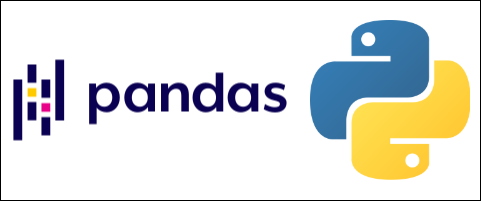

Pandas represents the de facto standard library to operate with dataframes, but it is not the only one (e.g., PySpark, Polars, CuDF, Vaex, etc.)

https://pandas.pydata.org/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Load and explore the dataset

Let us consider a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016, available on Kaggle (https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results).
In particular, the main CSV file contains 271116 rows, each one corresponding to an individual athlete competing in an individual Olympic event, and 15 columns:
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

In [4]:
df = pd.read_csv("datasets/olympic_games/athlete_events.csv")
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


[For students] Select the rows about Danish athletes.
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [7]:
df[df["NOC"] == "DEN"].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1303,734,Otto Mnsted Acthon,M,30.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Equestrianism,"Equestrianism Men's Jumping, Individual",NaN
1304,734,Otto Mnsted Acthon,M,30.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Equestrianism,"Equestrianism Men's Jumping, Team",NaN
1305,734,Otto Mnsted Acthon,M,34.0,NaN,NaN,Denmark,DEN,1952 Summer,1952,Summer,Helsinki,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",NaN


[For students] Get the list of (distinct) different names used to refer to the Danish NOC.

In [8]:
list(set(df[df["NOC"] == "DEN"]["Team"]))

['Snude',
 'Denmark-1',
 'Web II',
 'Web III',
 'Nurdug II',
 'Tip',
 'Chok',
 'Jill',
 'Denmark/Sweden',
 'Clearwater',
 'White Lady',
 'Kiel',
 'Polyteknisk Roklub-1',
 'Nykjbings paa Falster',
 'Dansk Idrts Forbund',
 'Miss Denmark 1964',
 'Skum',
 'Roklubb Kbnhavn-2',
 'Anitra',
 'Denmark-2',
 'Denmark-3',
 'Digby',
 'Morena',
 'Don Schufro',
 'Hi-Hi',
 'Denmark',
 'Snap',
 'Denmark-4',
 'Bonzo']

Data Wrangler provides a quick overview of the dataset and its properties.

https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler

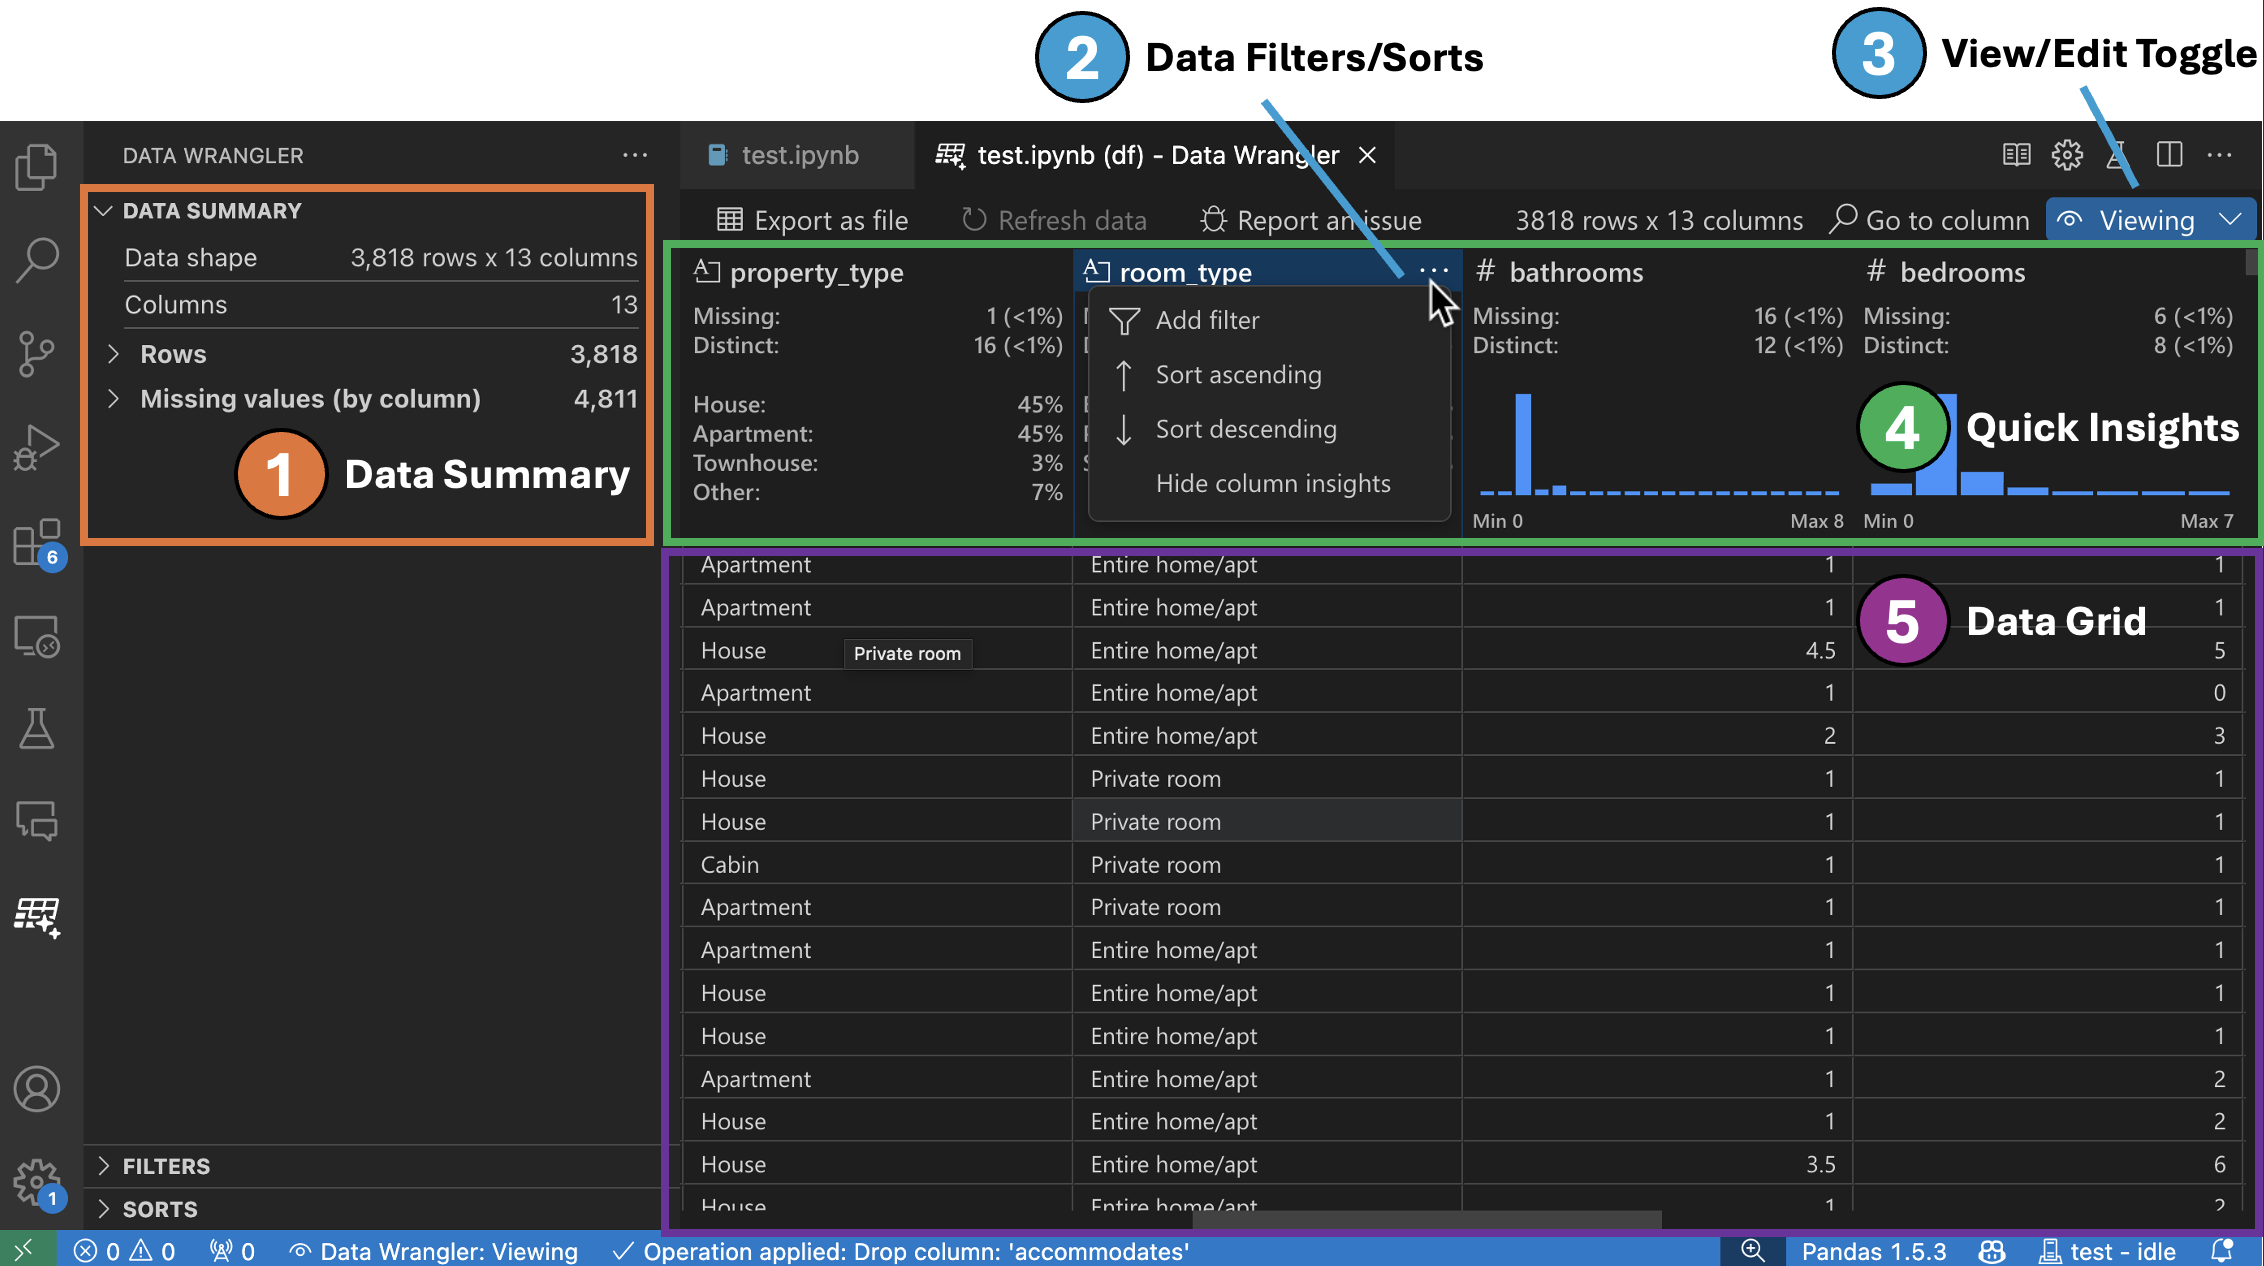

- The Data Summary panel shows detailed summary statistics for your overall dataset or a specific column, if one is selected.
- You can apply any Data Filters/Sorts on the column from the header menu of the column.
- Toggle between the Viewing or Editing mode of Data Wrangler to access the built-in data operations.
- The Quick Insights header is where you can quickly see valuable information about each column. Depending on the datatype of the column, quick insights shows the distribution of the data or the frequency of datapoints, as well as missing and distinct values.
- The Data Grid gives you a scrollable pane where you can view your entire dataset.

In [10]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Similarly, Data Wrangler allows to quickly and intuitively transform the dataset.

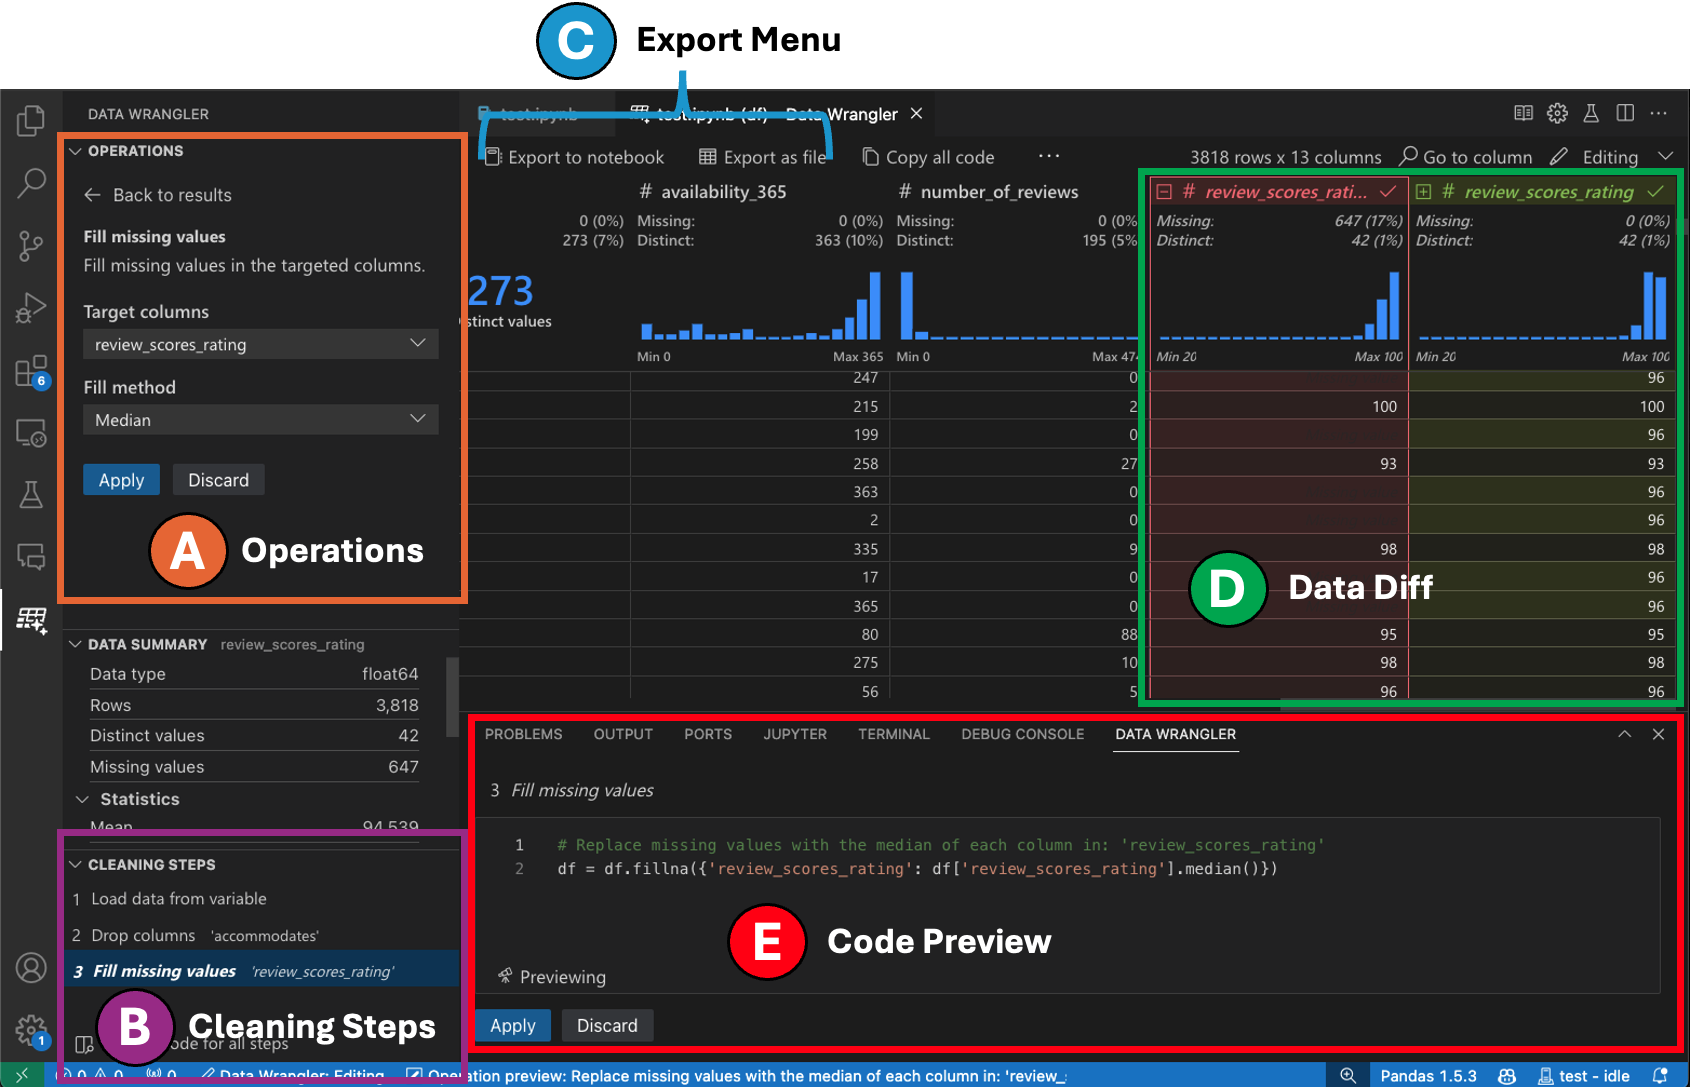

- The Operations panel is where you can search through all of Data Wrangler’s built-in data operations. The operations are organized by category.
- The Cleaning Steps panel shows a list of all the operations that have been previously applied. It enables the user to undo specific operations or edit the most recent operation. Selecting a step will highlight the changes in the data grid and will show the generated code associated with that operation.
- The Export Menu lets you export the code back into a Jupyter Notebook or export the data into a new file.
- When you have an operation selected and are previewing its effects on the data, the grid is overlayed with a data diff view of the changes you made to the data.
- The Code Preview section shows the Python and Pandas code that Data Wrangler has generated when an operation is selected. It remains empty when no operation is selected. You can edit the generated code, which results in the data grid highlighting the effects on the data.

Similarly, Data Wrangler allows to quickly and intuitively transform the dataset.

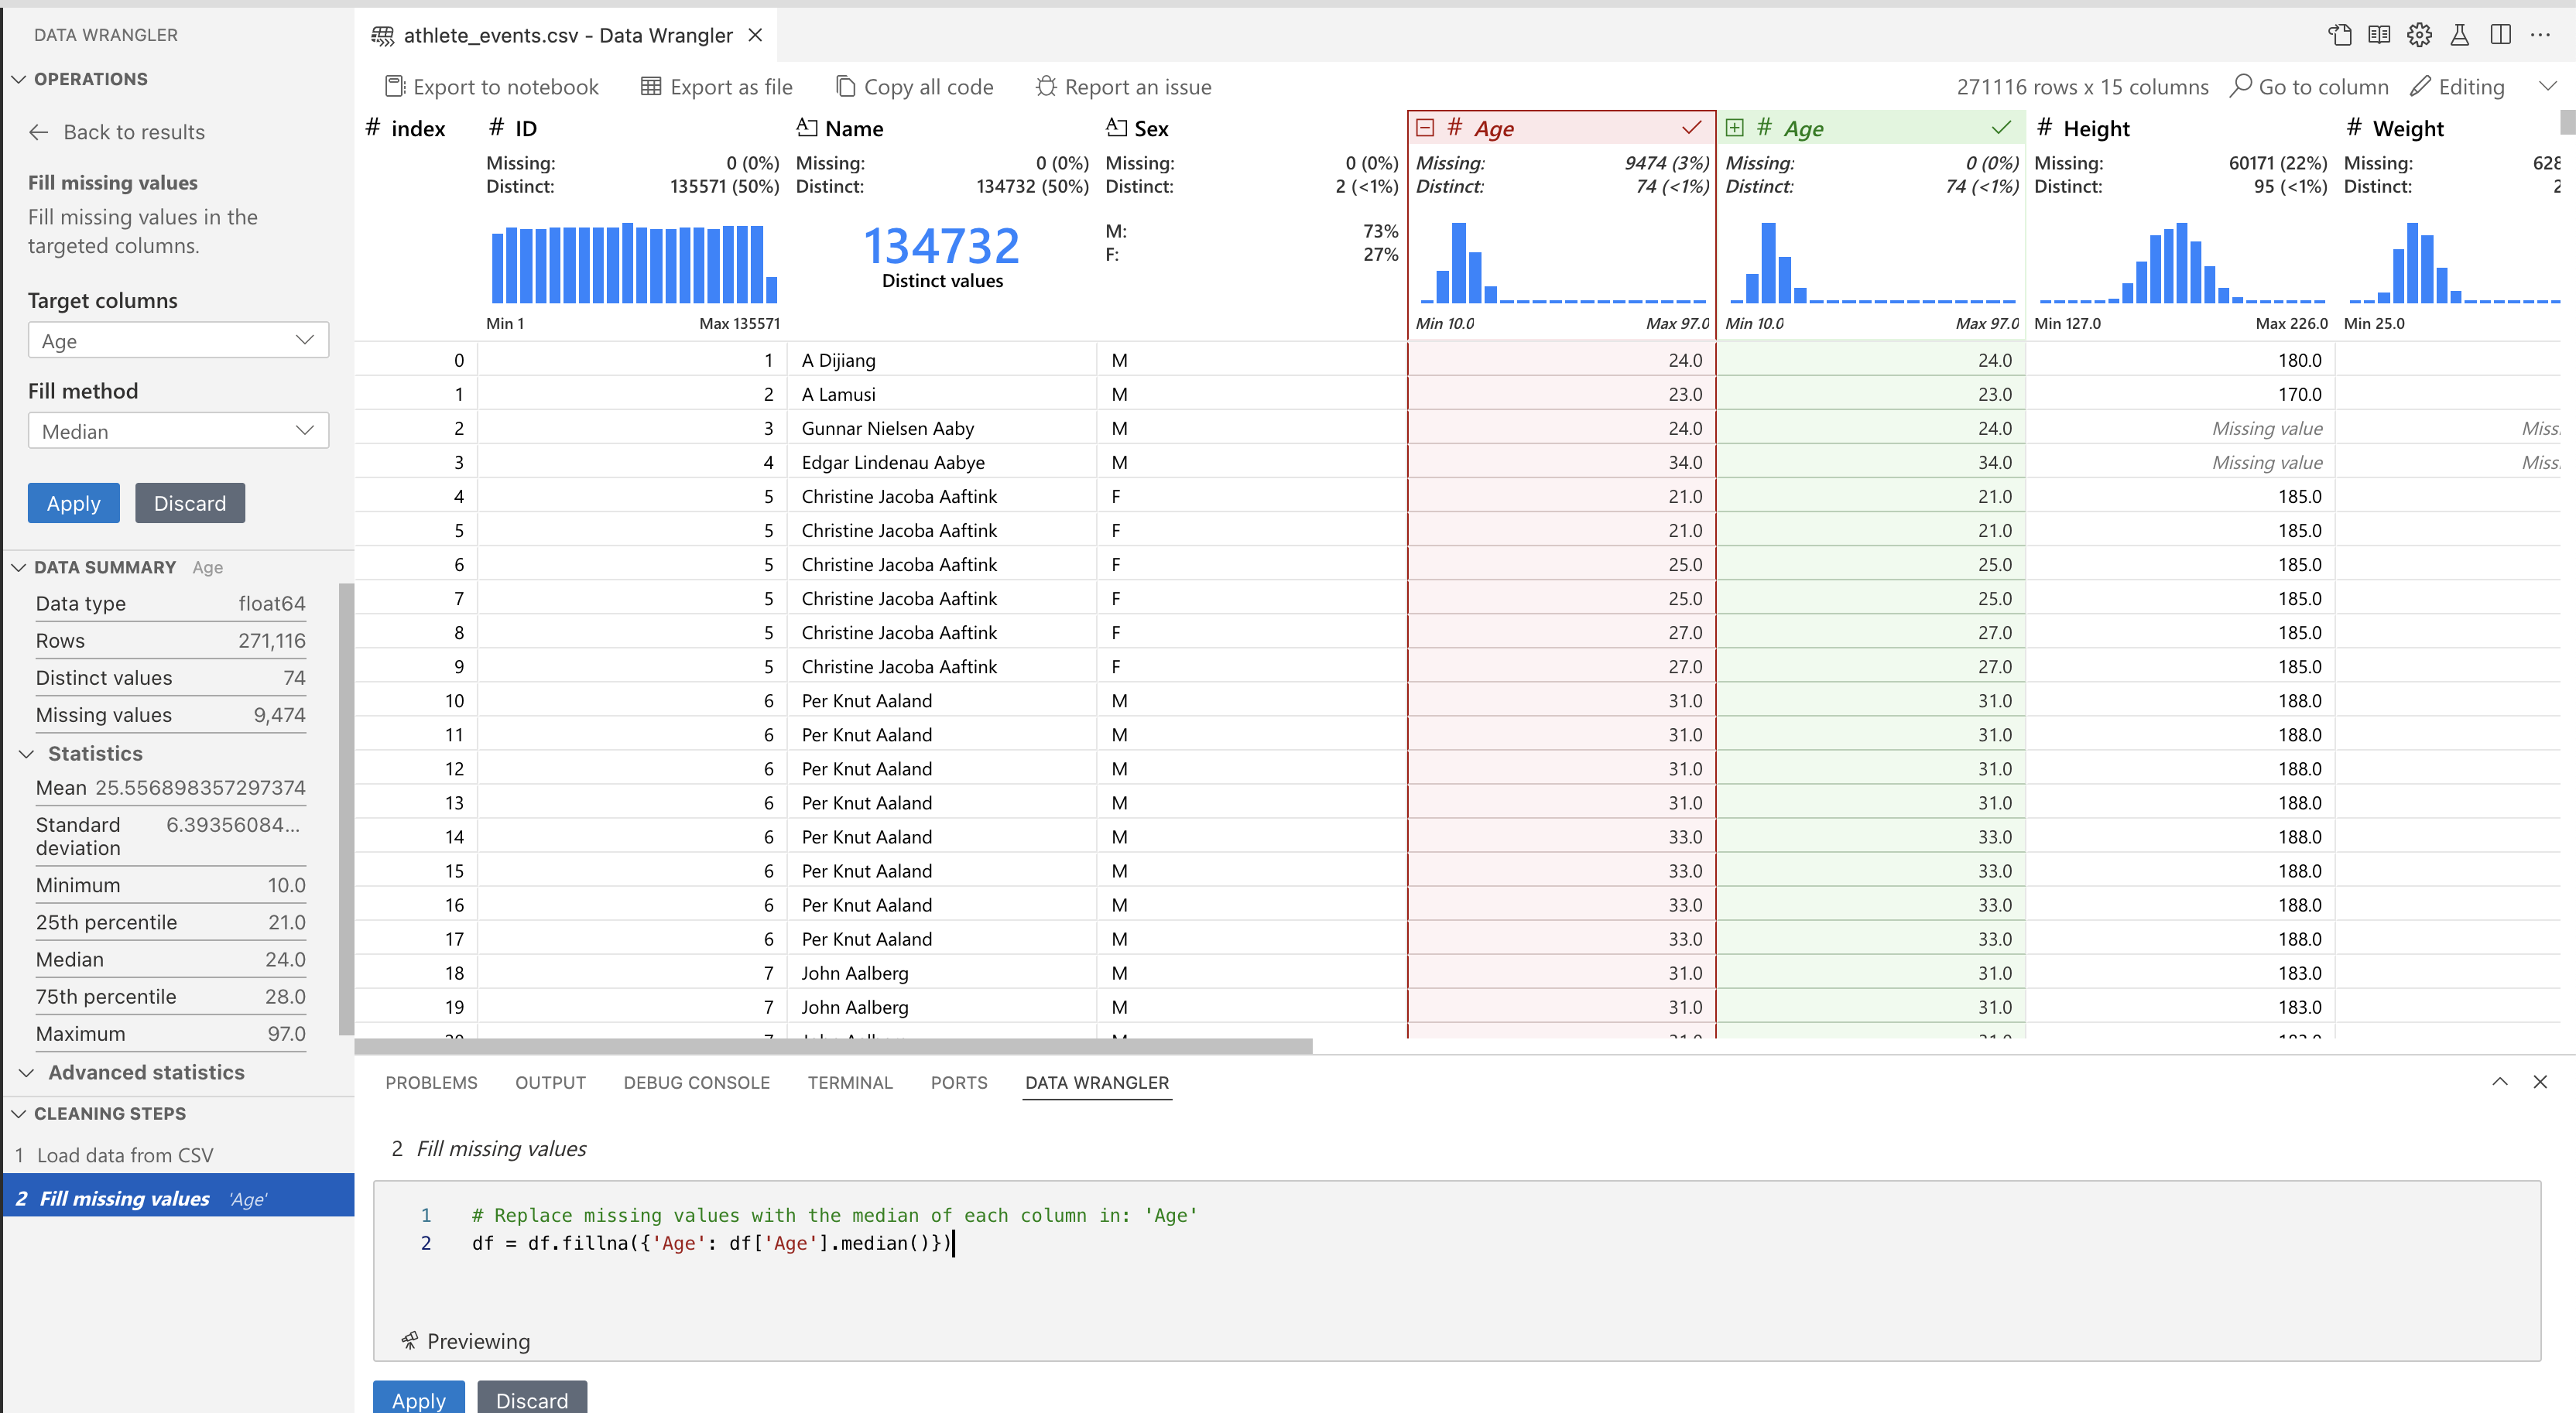

- The Operations panel is where you can search through all of Data Wrangler’s built-in data operations. The operations are organized by category.
- The Cleaning Steps panel shows a list of all the operations that have been previously applied. It enables the user to undo specific operations or edit the most recent operation. Selecting a step will highlight the changes in the data grid and will show the generated code associated with that operation.
- The Export Menu lets you export the code back into a Jupyter Notebook or export the data into a new file.
- When you have an operation selected and are previewing its effects on the data, the grid is overlayed with a data diff view of the changes you made to the data.
- The Code Preview section shows the Python and Pandas code that Data Wrangler has generated when an operation is selected. It remains empty when no operation is selected. You can edit the generated code, which results in the data grid highlighting the effects on the data.

In [11]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Preprocess the dataset

[For student] Change the type of the age, height, and weight columns to integer.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html

In [12]:
df["Age"] = df["Age"].astype("Int64")
df["Height"] = df["Height"].astype("Int64")
df["Weight"] = df["Weight"].round(0).astype("Int64")

In [13]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,<NA>,<NA>,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,<NA>,<NA>,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


[For students] Add two computed columns representing the height and the weight in feet (1 cm = 0.03280 ft) and pounds (1 kg = 2.20462 lbs), respectively. Then, rename the columns to denote their unit of measurement.
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [14]:
df["Height (ft)"] = (df["Height"] * 0.03280).round(3)
df["Weight (lbs)"] = (df["Weight"] * 2.20462).round(3)
df = df.rename(columns={"Height": "Height (cm)", "Weight": "Weight (kg)"})

In [15]:
df.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs)
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,5.904,176.37
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,5.576,132.277
2,3,Gunnar Nielsen Aaby,M,24,<NA>,<NA>,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,<NA>
3,4,Edgar Lindenau Aabye,M,34,<NA>,<NA>,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,<NA>
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,6.068,180.779


[For students] Set the "Sex" column values to "Male" and "Female".
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [16]:
df.loc[df["Sex"] == "M", "Sex"] = "Male"
df.loc[df["Sex"] == "F", "Sex"] = "Female"

In [17]:
df.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs)
0,1,A Dijiang,Male,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,5.904,176.37
1,2,A Lamusi,Male,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,5.576,132.277
2,3,Gunnar Nielsen Aaby,Male,24,<NA>,<NA>,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,<NA>
3,4,Edgar Lindenau Aabye,Male,34,<NA>,<NA>,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,<NA>
4,5,Christine Jacoba Aaftink,Female,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,6.068,180.779


[For student] Get the name of each Olympics edition in the "City Year" format, e.g., "Tokyo 2020", replacing the actual "Year Season" format.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [18]:
df["Edition"] = df["City"] + " " + df["Year"].astype(str)
df = df.drop(columns=["Games"])


In [19]:
df.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),Team,NOC,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs),Edition
0,1,A Dijiang,Male,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,5.904,176.37,Barcelona 1992
1,2,A Lamusi,Male,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,5.576,132.277,London 2012
2,3,Gunnar Nielsen Aaby,Male,24,<NA>,<NA>,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,<NA>,Antwerpen 1920
3,4,Edgar Lindenau Aabye,Male,34,<NA>,<NA>,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,<NA>,Paris 1900
4,5,Christine Jacoba Aaftink,Female,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,6.068,180.779,Calgary 1988


[For student] Use the information contained in the NOC dataset to associate to each row a consistent name for the represented nation, removing the current one in the "Team" column.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [20]:
noc = pd.read_csv("datasets/olympic_games/noc_regions.csv")
noc.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [21]:
df = df.join(noc[["NOC", "region"]].set_index("NOC"), on="NOC")
df = df.drop(columns=["Team"])
df = df.rename(columns={"region": "Nation"})
df.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),NOC,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs),Edition,Nation
0,1,A Dijiang,Male,24,180,80,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,5.904,176.37,Barcelona 1992,China
1,2,A Lamusi,Male,23,170,60,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,5.576,132.277,London 2012,China
2,3,Gunnar Nielsen Aaby,Male,24,<NA>,<NA>,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,<NA>,<NA>,Antwerpen 1920,Denmark
3,4,Edgar Lindenau Aabye,Male,34,<NA>,<NA>,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,<NA>,Paris 1900,Denmark
4,5,Christine Jacoba Aaftink,Female,21,185,82,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,6.068,180.779,Calgary 1988,Netherlands


## Perform some data analysis

[For students] What is the distribution of the age of gold medalists (ignoring athletes with unknown age)?
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [22]:
gold_medals = df[df.Medal == "Gold"]
gold_medals.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),NOC,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs),Edition,Nation
3,4,Edgar Lindenau Aabye,Male,34,<NA>,<NA>,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,<NA>,Paris 1900,Denmark
42,17,Paavo Johannes Aaltonen,Male,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,5.74,141.096,London 1948,Finland
44,17,Paavo Johannes Aaltonen,Male,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,5.74,141.096,London 1948,Finland
48,17,Paavo Johannes Aaltonen,Male,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,5.74,141.096,London 1948,Finland
60,20,Kjetil Andr Aamodt,Male,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,5.773,187.393,Albertville 1992,Norway


In [23]:
gold_medals = gold_medals[gold_medals["Age"] > 0]
gold_medals.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),NOC,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs),Edition,Nation
3,4,Edgar Lindenau Aabye,Male,34,<NA>,<NA>,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,<NA>,<NA>,Paris 1900,Denmark
42,17,Paavo Johannes Aaltonen,Male,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,5.74,141.096,London 1948,Finland
44,17,Paavo Johannes Aaltonen,Male,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,5.74,141.096,London 1948,Finland
48,17,Paavo Johannes Aaltonen,Male,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,5.74,141.096,London 1948,Finland
60,20,Kjetil Andr Aamodt,Male,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,5.773,187.393,Albertville 1992,Norway


Text(0.5, 1.0, 'Distribution of Gold Medals')

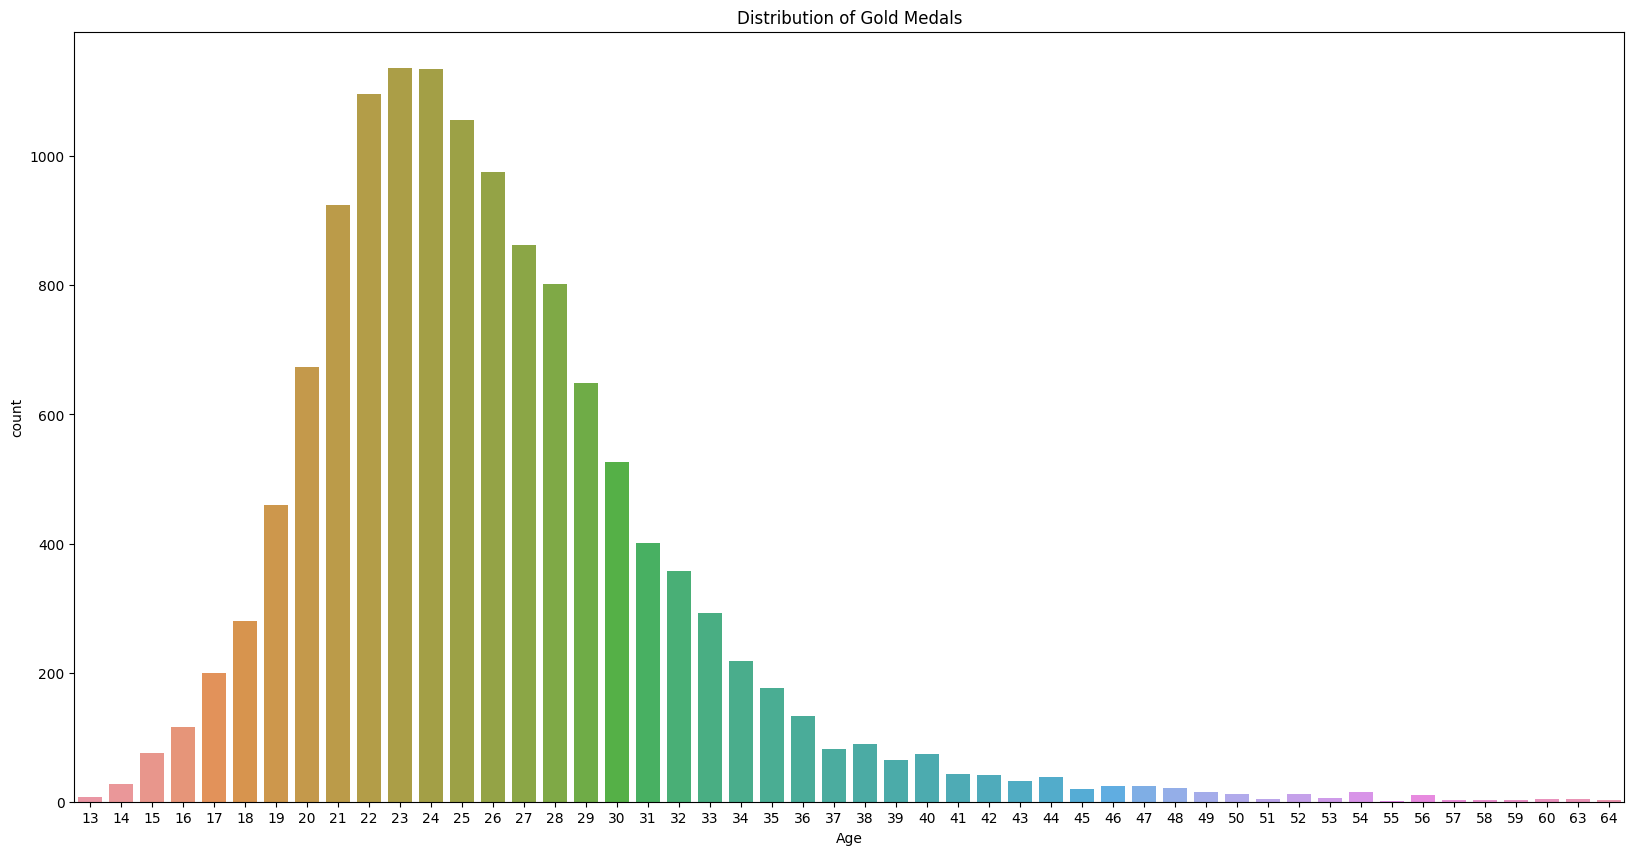

In [24]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x="Age", data=gold_medals)
plt.title("Distribution of Gold Medals")

[For students] What is the number of medals assigned to women in every edition of summer Olympics?

In [25]:
women_summer_medals = df[(df["Sex"] == "Female") & (df["Season"] == "Summer") & (df["Medal"].isin(["Gold", "Silver", "Bronze"]))]
women_summer_medals.head(5)

,ID,Name,Sex,Age,Height (cm),Weight (kg),NOC,Year,Season,City,Sport,Event,Medal,Height (ft),Weight (lbs),Edition,Nation
79,21,Ragnhild Margrethe Aamodt,Female,27,163,<NA>,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,5.346,<NA>,Beijing 2008,Norway
91,29,Willemien Aardenburg,Female,22,<NA>,<NA>,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,<NA>,<NA>,Seoul 1988,Netherlands
105,37,Ann Kristin Aarnes,Female,23,182,64,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,5.97,141.096,Atlanta 1996,Norway
161,65,Patimat Abakarova,Female,21,165,49,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,5.412,108.026,Rio de Janeiro 2016,Azerbaijan
163,67,Mariya Vasilyevna Abakumova (-Tarabina),Female,22,179,80,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,5.871,176.37,Beijing 2008,Russia


Text(0.5, 1.0, 'Women medals per edition of the Games')

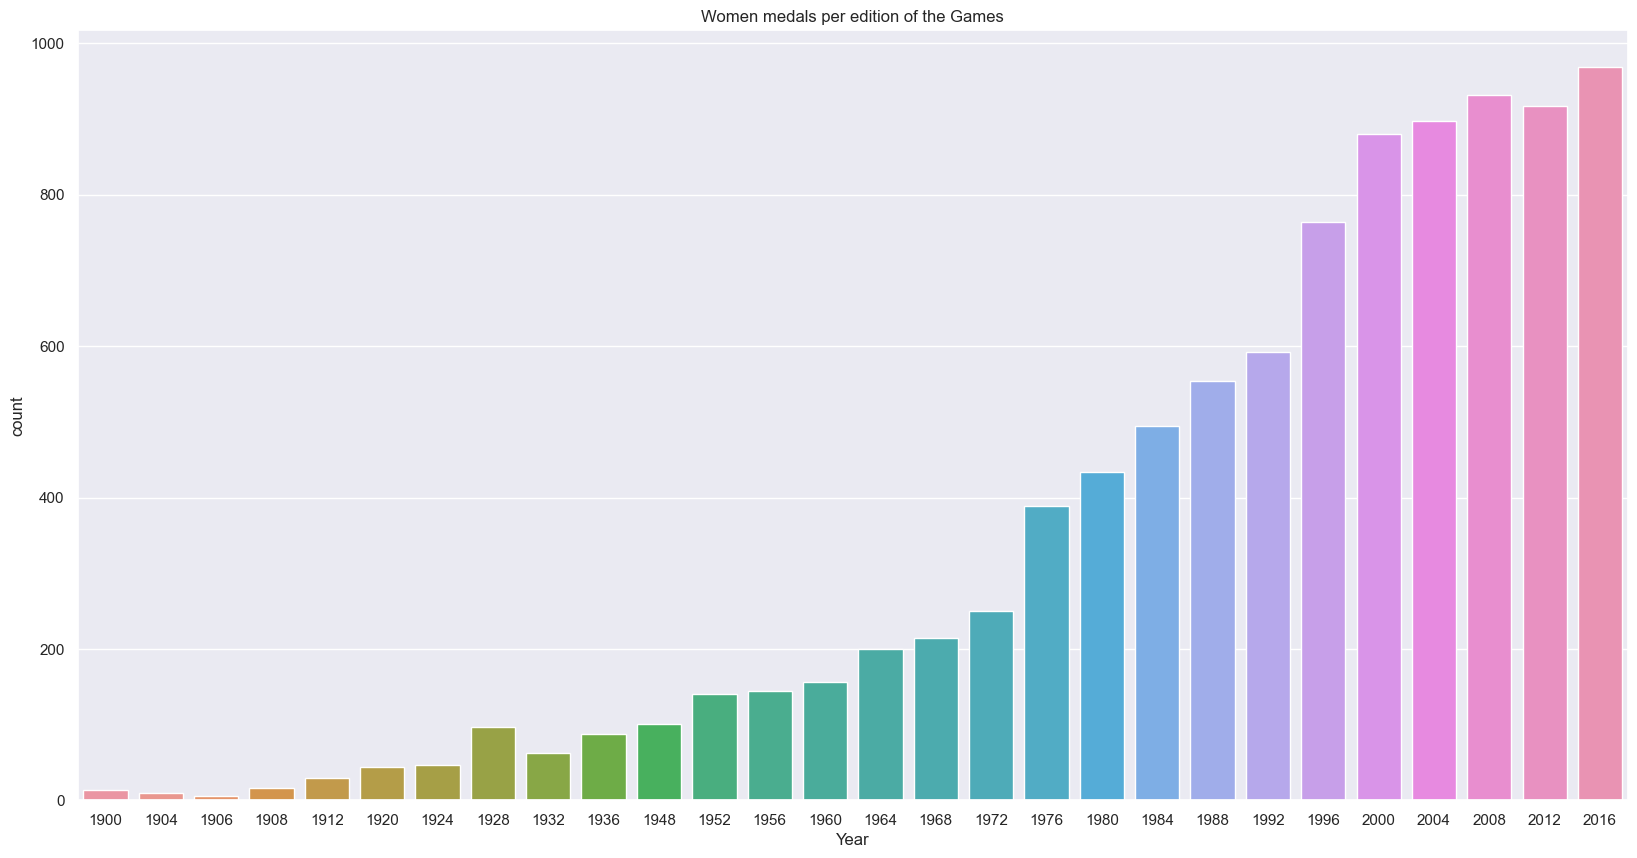

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women_summer_medals)
plt.title('Women medals per edition of the Games')

## Create a new dataframe about summer Olympics editions

The dataframe should appear in the following format: ["No.", "Edition", "Year", "City", "Region"].
The information about nation and continent are present in the dedicated CSV file, scraped from Wikipedia (https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities) using wikitables2csv (https://wikitable2csv.ggor.de/). Note that some inconsistencies in the city naming are present.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

In [27]:
olympics = df[df["Season"] == "Summer"][["Edition", "Year", "City"]]
olympics.head(5)

,Edition,Year,City
0,Barcelona 1992,1992,Barcelona
1,London 2012,2012,London
2,Antwerpen 1920,1920,Antwerpen
3,Paris 1900,1900,Paris
26,Los Angeles 1932,1932,Los Angeles


In [28]:
olympics = olympics.drop_duplicates(subset=["Edition"], keep="first")
olympics = olympics.sort_values(by="Year", ignore_index=True)
olympics = olympics.reset_index()
olympics = olympics.rename(columns={"index": "No."})
olympics["No."] = olympics["No."] + 1
olympics.head(5)

,No.,Edition,Year,City
0,1,Athina 1896,1896,Athina
1,2,Paris 1900,1900,Paris
2,3,St. Louis 1904,1904,St. Louis
3,4,Athina 1906,1906,Athina
4,5,London 1908,1908,London


In [29]:
cities = pd.read_csv("datasets/olympic_games/olympic_games_host_cities.csv")
cities = cities.drop_duplicates(subset=["City.1"], keep="first")
cities.head(5)

,City,City.1,Country,Year,Region,Summer,Winter,Opening\n ceremony,Closing\n ceremony,Ref
0,NaN,Athens,Greece,1896,Europe,S005I,NaN,6 April 1896,15 April 1896,NaN
1,NaN,Paris,France,1900,Europe,S005II,NaN,14 May 1900,28 October 1900,NaN
2,NaN,St. Louis,United States,1904,North America,S005III,NaN,1 July 1904,23 November 1904,NaN
3,NaN,London,United Kingdom,1908,Europe,S005IV,NaN,27 April 1908,31 October 1908,NaN
4,NaN,Stockholm,Sweden,1912,Europe,S005V,NaN,6 July 1912,22 July 1912,NaN


In [30]:
set(olympics["City"]).difference(set(cities["City.1"]))

{'Antwerpen', 'Athina', 'Melbourne', 'Moskva', 'Roma'}

In [31]:
olympics["City"] = olympics["City"].replace(to_replace={"Antwerpen": "Antwerp", "Athina": "Athens", "Moskva": "Moscow", "Roma": "Rome"})
olympics.head(5)

,No.,Edition,Year,City
0,1,Athina 1896,1896,Athens
1,2,Paris 1900,1900,Paris
2,3,St. Louis 1904,1904,St. Louis
3,4,Athina 1906,1906,Athens
4,5,London 1908,1908,London


In [32]:
olympics = olympics.join(cities[["City.1", "Region"]].set_index("City.1"), on="City")
olympics

,No.,Edition,Year,City,Region
0,1,Athina 1896,1896,Athens,Europe
1,2,Paris 1900,1900,Paris,Europe
2,3,St. Louis 1904,1904,St. Louis,North America
3,4,Athina 1906,1906,Athens,Europe
4,5,London 1908,1908,London,Europe
5,6,Stockholm 1912,1912,Stockholm,Europe
6,7,Antwerpen 1920,1920,Antwerp,Europe
7,8,Paris 1924,1924,Paris,Europe
8,9,Amsterdam 1928,1928,Amsterdam,Europe
9,10,Los Angeles 1932,1932,Los Angeles,North America


In [33]:
olympics.loc[olympics["City"] == "Melbourne", "Region"] = "Oceania"
olympics

,No.,Edition,Year,City,Region
0,1,Athina 1896,1896,Athens,Europe
1,2,Paris 1900,1900,Paris,Europe
2,3,St. Louis 1904,1904,St. Louis,North America
3,4,Athina 1906,1906,Athens,Europe
4,5,London 1908,1908,London,Europe
5,6,Stockholm 1912,1912,Stockholm,Europe
6,7,Antwerpen 1920,1920,Antwerp,Europe
7,8,Paris 1924,1924,Paris,Europe
8,9,Amsterdam 1928,1928,Amsterdam,Europe
9,10,Los Angeles 1932,1932,Los Angeles,North America


## Create a new dataframe about the athletes

The dataframe should appear in the following format: ["ID", "Name", "Sex", "Year of Birth", "Height (cm)", "Weight (kg)", "Nation", "Sport", "Medals"].
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [34]:
athletes = df
athletes["Year of Birth"] = athletes["Year"] - athletes["Age"]
athletes = athletes.drop_duplicates(subset=["ID"], keep="first")
athletes = athletes[["ID", "Name", "Sex", "Year of Birth", "Height (cm)", "Weight (kg)", "Nation", "Sport"]]
athletes.head(5)

,ID,Name,Sex,Year of Birth,Height (cm),Weight (kg),Nation,Sport
0,1,A Dijiang,Male,1968,180,80,China,Basketball
1,2,A Lamusi,Male,1989,170,60,China,Judo
2,3,Gunnar Nielsen Aaby,Male,1896,<NA>,<NA>,Denmark,Football
3,4,Edgar Lindenau Aabye,Male,1866,<NA>,<NA>,Denmark,Tug-Of-War
4,5,Christine Jacoba Aaftink,Female,1967,185,82,Netherlands,Speed Skating


In [35]:
medals = df[df["Medal"].isin(["Gold", "Silver", "Bronze"])][["ID", "Medal"]].groupby(["ID"]).count()
medals = medals.rename(columns={"Medal": "Medals"})
medals

,Medals
ID,
4,1
15,2
16,1
17,5
20,8
...,...
135544,1
135545,2
135553,3


In [36]:
athletes = athletes.join(medals, on="ID")
athletes["Medals"] = athletes["Medals"].astype("Int64")
athletes["Medals"] = athletes["Medals"].fillna(0)
athletes

,ID,Name,Sex,Year of Birth,Height (cm),Weight (kg),Nation,Sport,Medals
0,1,A Dijiang,Male,1968,180,80,China,Basketball,0
1,2,A Lamusi,Male,1989,170,60,China,Judo,0
2,3,Gunnar Nielsen Aaby,Male,1896,<NA>,<NA>,Denmark,Football,0
3,4,Edgar Lindenau Aabye,Male,1866,<NA>,<NA>,Denmark,Tug-Of-War,1
4,5,Christine Jacoba Aaftink,Female,1967,185,82,Netherlands,Speed Skating,0
...,...,...,...,...,...,...,...,...,...
271108,135567,Aleksandr Viktorovich Zyuzin,Male,1976,183,72,Russia,Rowing,0
271110,135568,Olga Igorevna Zyuzkova,Female,1983,171,69,Belarus,Basketball,0
271111,135569,Andrzej ya,Male,1947,179,89,Poland,Luge,0
271112,135570,Piotr ya,Male,1987,176,59,Poland,Ski Jumping,0


In [37]:
athletes.sort_values(by="Medals", ascending=False).head(10)

,ID,Name,Sex,Year of Birth,Height (cm),Weight (kg),Nation,Sport,Medals
187887,94406,"Michael Fred Phelps, II",Male,1985,193,91,USA,Swimming,28
133184,67046,Larysa Semenivna Latynina (Diriy-),Female,1935,161,52,Russia,Gymnastics,18
7510,4198,Nikolay Yefimovich Andrianov,Male,1953,166,60,Russia,Gymnastics,15
177408,89187,Takashi Ono,Male,1932,160,58,Japan,Gymnastics,13
22698,11951,Ole Einar Bjrndalen,Male,1974,178,65,Norway,Biathlon,13
148317,74420,Edoardo Mangiarotti,Male,1919,<NA>,<NA>,Italy,Fencing,13
217312,109161,Borys Anfiyanovych Shakhlin,Male,1932,171,71,Russia,Gymnastics,13
169657,85286,Aleksey Yuryevich Nemov,Male,1976,174,75,Russia,Gymnastics,12
239223,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Female,1973,177,69,USA,Swimming,12
173959,87390,Paavo Johannes Nurmi,Male,1898,174,65,Finland,Athletics,12


Netflix Movies and TV Shows: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows